# EJERCICIOS

In [3]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning

In [22]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

In [23]:
# El modelo se está sobreajustando a los datos de entrenamiento y no generaliza bien en los datos de prueba
# Podemos arreglarlo de varias maneras:

# 1. Reduciendo el grado del polinomio para simplificar el modelo, usando PolynomialFeatures(degree=)
# 2. Aplicando regularización al modelo como Ridge o Lasso, para que se le penalice al modelo por intentar ajustarse demasiado
# 3. Generar más datos de entrenamiento diversos, para que los patrones que aprende el modelo pueda aplicarlos en datos diferentes

## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

In [24]:
# Eso indicaría un modelo subajustado, habría que reducir el alpha

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [25]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

Muestra los primero datos de X e y

In [26]:
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [27]:
print(y.head())

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


Usa .describe y .info para ver un poco de información

In [28]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [30]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Representa cada una de la características

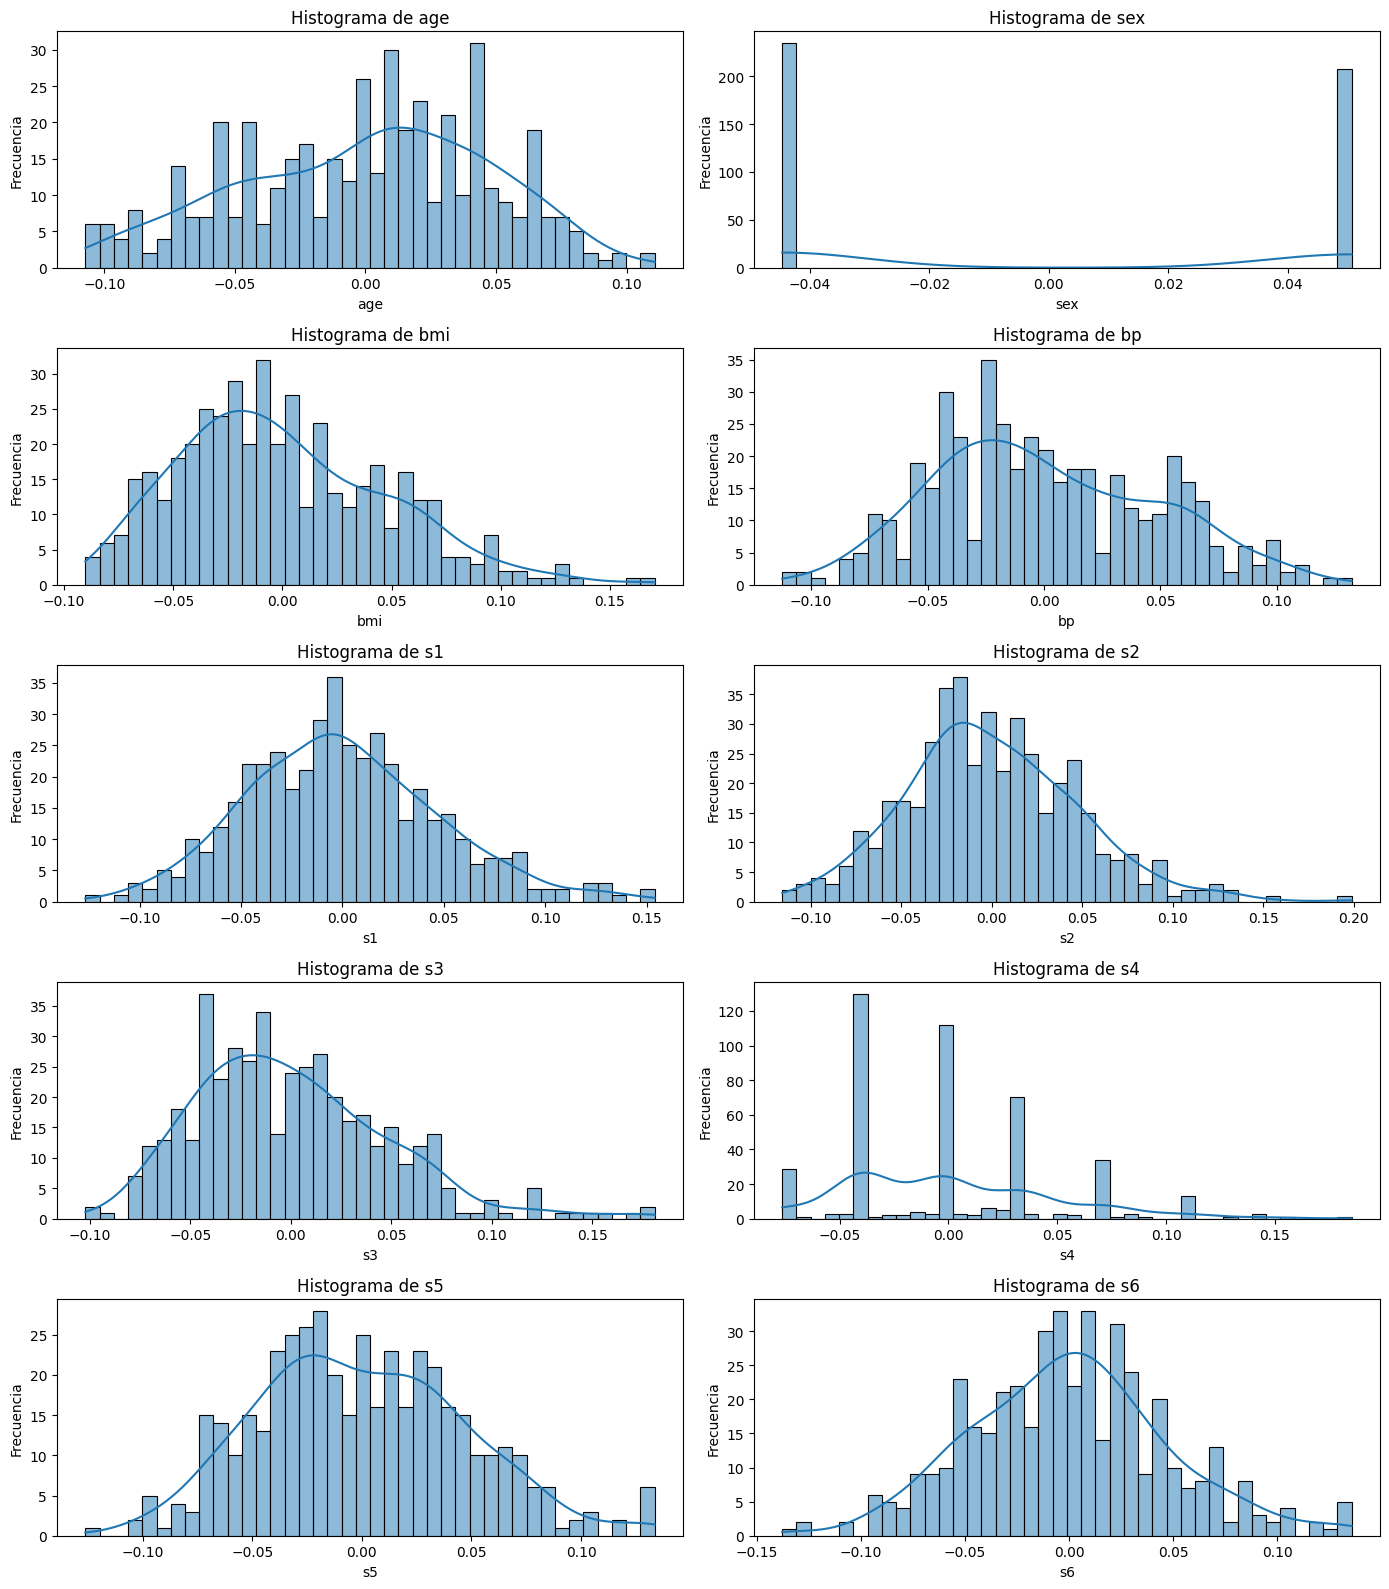

In [31]:
# Crear la cuadrícula de subplots 5x2
fig, axes = plt.subplots(5, 2, figsize=(14, 16))  # Tamaño de la figura ajustado
axes = axes.flatten()  # Aplanar el arreglo de ejes para un acceso más fácil

# Índice para los subplots
idx = 0

# Graficar las variables numéricas
for columna in X.columns:
    if idx < len(axes):  # Verificar si el índice está dentro del rango de subplots
        sns.histplot(data=X, x=columna, bins=40, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Histograma de {columna}')
        axes[idx].set_xlabel(columna)
        axes[idx].set_ylabel('Frecuencia')
        idx += 1

# Eliminar cualquier subplot no utilizado
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

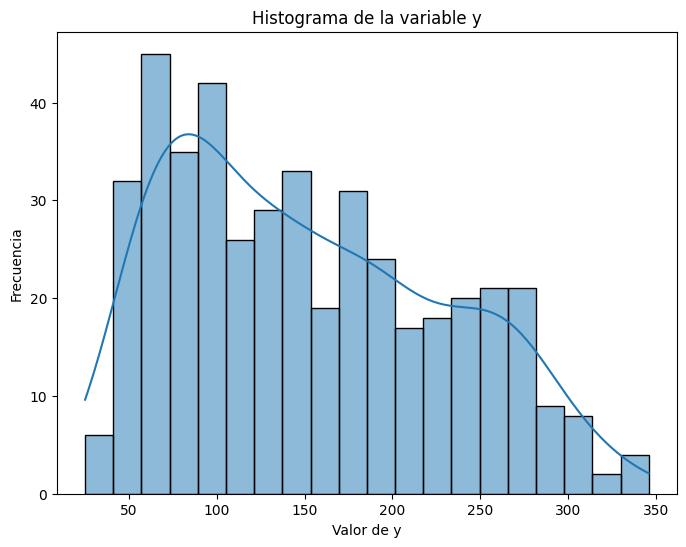

In [32]:
# Crear el histograma con seaborn
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True)

# Etiquetas
plt.title('Histograma de la variable y')
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Muestra la matriz de correlaciones

In [33]:
# Crear copia de las caracteristicas para unirle la variable objetivo
temp = X.copy()
temp["target"] = y

# Crear matriz de correlación y dibujarla
corr_matrix = temp.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [34]:
# Ordenar los valores más correlacionados para target
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

#### DIVIDIR LOS DATOS

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [36]:
from sklearn.compose import ColumnTransformer

preprocessing = StandardScaler()

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [37]:
from sklearn.metrics import mean_squared_error

# Suprimir UserWarning dado a que se queja de no tener variedad de clases cuando hacemos regresión y no clasificación
warnings.filterwarnings("ignore", category=UserWarning)

# Definir los modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Logística": LogisticRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso()
}

# Evaluación de los modelos con validación cruzada
for name, model in models.items():
    print(f"Entrenando y evaluando el modelo: {name}")

    # Hacer la pipeline
    pipeline = make_pipeline(preprocessing,model)
    
    # Realizar validación cruzada y obtener los resultados de MSE
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
    
    # Mostrar el RMSE
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"RMSE en el conjunto de entrenamiento: {rmse:.2f}")

Entrenando y evaluando el modelo: Regresión Lineal
RMSE en el conjunto de entrenamiento: 56.05
Entrenando y evaluando el modelo: Regresión Logística
RMSE en el conjunto de entrenamiento: 73.06
Entrenando y evaluando el modelo: Ridge
RMSE en el conjunto de entrenamiento: 55.98
Entrenando y evaluando el modelo: Lasso
RMSE en el conjunto de entrenamiento: 55.94


Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [38]:
print(f"Máximo de y: {max(y)} , mínimo de y: {min(y)}")

Máximo de y: 346.0 , mínimo de y: 25.0


In [39]:
# No es malo pero una diferencia de 55 en un rango de 346-25 es bastante, se podría optimizar

### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

In [40]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Creamos la pipeline
pipeline = make_pipeline(preprocessing,Ridge())

# Definir la distribución para alpha
alpha_distribution = uniform(loc=0.1, scale=1000)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={'ridge__alpha': alpha_distribution},
    n_iter=100,  # Número de iteraciones
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': np.float64(34.4885211152184)}


Evalúa este mejor modelo en el conjunto de pruebas

In [41]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = random_search.best_estimator_

# Realizar validación cruzada y obtener los resultados de MSE
y_pred = cross_val_predict(best_model, X_test, y_test, cv=5)

# Mostrar el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE con el modelo óptimo: {rmse:.2f}")

RMSE con el modelo óptimo: 56.03


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [42]:
joblib.dump(best_model, "./modelo2_11Diabetes.pkl")

['./modelo2_11Diabetes.pkl']

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

In [43]:
#TODO

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [5]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

In [45]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [48]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

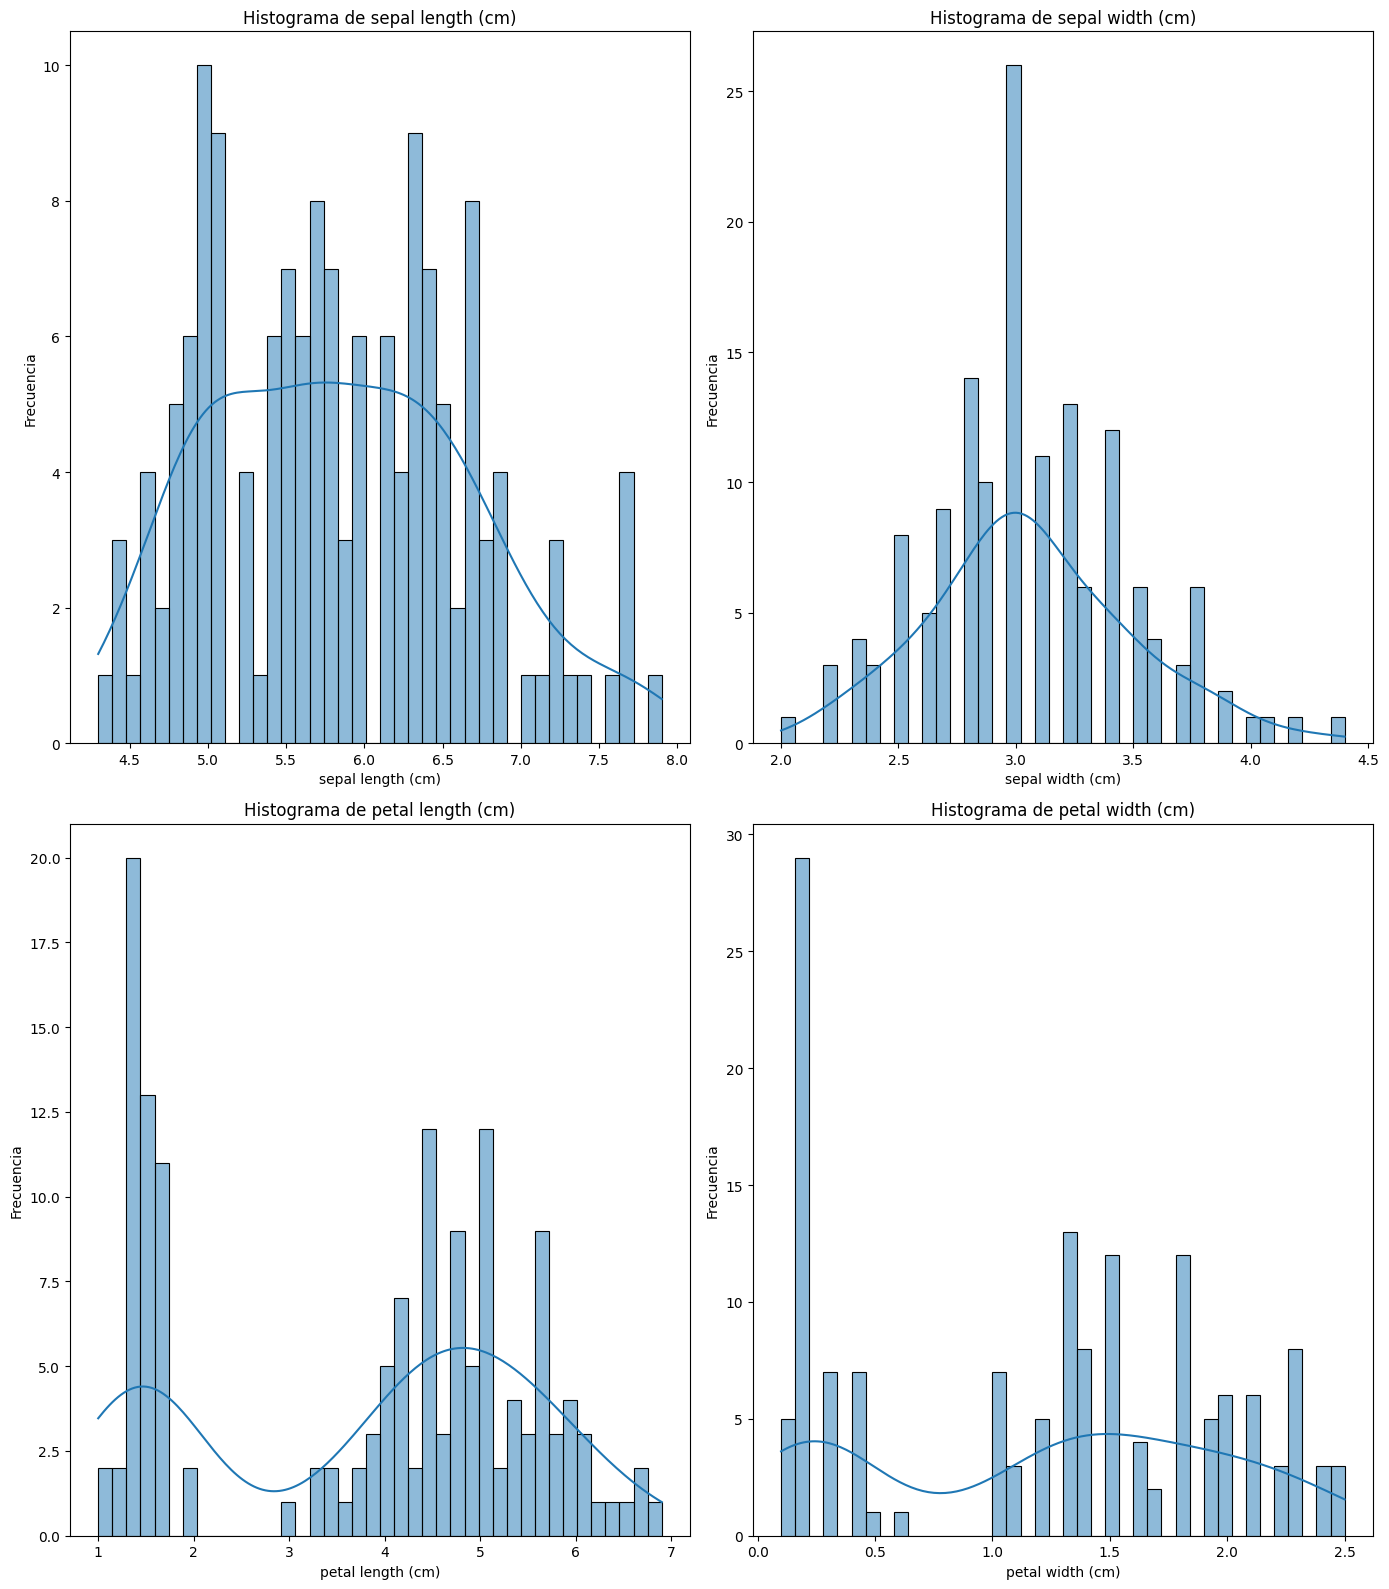

In [50]:
# Crear la cuadrícula de subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 16))  # Tamaño de la figura ajustado
axes = axes.flatten()  # Aplanar el arreglo de ejes para un acceso más fácil

# Índice para los subplots
idx = 0

# Graficar las variables numéricas
for columna in X.columns:
    if idx < len(axes):  # Verificar si el índice está dentro del rango de subplots
        sns.histplot(data=X, x=columna, bins=40, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Histograma de {columna}')
        axes[idx].set_xlabel(columna)
        axes[idx].set_ylabel('Frecuencia')
        idx += 1

# Eliminar cualquier subplot no utilizado
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Representa la matriz de correlaciones

In [51]:
# Hacemos copia temporal para unir caracteristicas y target
temp = X.copy()
temp["class"] = y

# Sacamos matriz de correlacion
corr_matrix = temp.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [52]:
# Ordenar resultados de la columna class
corr_matrix["class"].sort_values(ascending=False)

class                1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: class, dtype: float64

#### DIVIDIR LOS DATOS

In [53]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [54]:
# Crear pipeline para el modelo
pipeline = make_pipeline(StandardScaler(),LogisticRegression())

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluación cruzada
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

# Calcular la exactitud
train_accuracy = accuracy_score(y_train, y_train_pred)

# Enseñar resultado
print(f"Exactitud en el conjunto de entrenamiento:{train_accuracy:.4f}")

Exactitud en el conjunto de entrenamiento:0.9583


Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

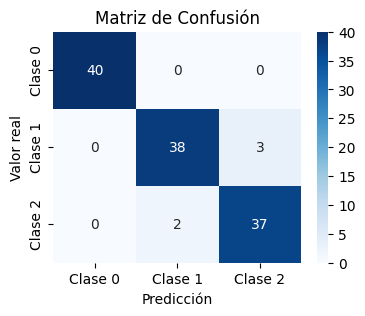

Precisión en el conjunto de entrenamiento:0.9583
Sensibilidad en el conjunto de entrenamiento:0.9583
F1 en el conjunto de entrenamiento:0.9583


In [55]:
# Calcular la matriz de confusión
matrix = confusion_matrix(y_train,y_train_pred)

# Calcular la precision con la media macro dado a que tenemos datos balanceados
train_precision = precision_score(y_train, y_train_pred, average='macro')

# Calcular la sensibildiad o recall
train_recall = recall_score(y_train, y_train_pred, average='macro')

# Calcular el F-1
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Enseñar resultado

# Crear el gráfico con Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

print(f"Precisión en el conjunto de entrenamiento:{train_accuracy:.4f}")
print(f"Sensibilidad en el conjunto de entrenamiento:{train_accuracy:.4f}")
print(f"F1 en el conjunto de entrenamiento:{train_accuracy:.4f}")

¿Qué podemos deducir?

In [ ]:
# Según la matriz de confusión el modelo diferencia bien la clase 0 pero confunde en algunas ocasiones las clases 1 y 2

In [13]:
temp = X.copy()
temp["target"] = y
temp[temp['target'] == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
temp[temp['target'] == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [19]:
temp[temp['target'] == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Aunque en las tres clase los pétalos son bastante diferentes, entre la clase 1 y 2 el sépalo tiene datos similares, es probable que confunda la clase en eso caso parecidos

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [57]:
from sklearn.model_selection import GridSearchCV

# Espacio de hiperparámetros a explorar
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'logisticregression__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'logisticregression__max_iter': [5000],                             # Número máximo de iteraciones
    'logisticregression__random_state': [42]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,   # Usamos param_grid en lugar de param_distributions
    scoring="accuracy",      # Métrica de evaluación
    cv=5,                    # Validación cruzada con 5 folds
    verbose=1,               # Mostrar progreso
    n_jobs=-1,               # Usar todos los núcleos disponibles
)

# Realizar la búsqueda en rejilla en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros: {'logisticregression__C': 1, 'logisticregression__max_iter': 5000, 'logisticregression__random_state': 42, 'logisticregression__solver': 'lbfgs'}


### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

Exactitud en el conjunto de prueba:1.0000


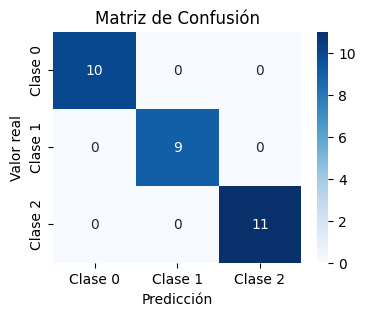

Precisión en el conjunto de prueba:1.0000
Sensibilidad en el conjunto de prueba:1.0000
F1 en el conjunto de prueba:1.0000


In [58]:
# Definir el mejor modelo
best_model = grid_search.best_estimator_

# Predecir
y_test_pred = best_model.predict(X_test)

# Calcular la exactitud
test_accuracy = accuracy_score(y_test, y_test_pred)

# Enseñar resultado
print(f"Exactitud en el conjunto de prueba:{test_accuracy:.4f}")

# Calcular la matriz de confusión
matrix = confusion_matrix(y_test,y_test_pred)

# Calcular la precision con la media macro dado a que tenemos datos balanceados
test_precision = precision_score(y_test, y_test_pred, average='macro')

# Calcular la sensibildiad o recall
test_recall = recall_score(y_test, y_test_pred, average='macro')

# Calcular el F-1
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Enseñar resultado

# Crear el gráfico con Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

print(f"Precisión en el conjunto de prueba:{test_accuracy:.4f}")
print(f"Sensibilidad en el conjunto de prueba:{test_precision:.4f}")
print(f"F1 en el conjunto de prueba:{test_recall:.4f}")

### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [59]:
joblib.dump(best_model, "./modelo2_11Iris.pkl")

['./modelo2_11Iris.pkl']

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

In [60]:
# Cargamos el dataset descargado porque no me voy a poner con la API de Kaggle
co2 = pd.read_csv("./datos/CO2.csv")

# Extraemos caracteristicas del target (CO2)
X = co2.drop('CO2', axis=1)
y = co2['CO2']

In [61]:
# Exploramos el comienzo de X
X.head()

,Car,Model,Volume,Weight,Unnamed: 5
0,Toyota,Aygo,1000,790,NaN
1,Mitsubishi,Space Star,1200,1160,NaN
2,Skoda,Citigo,1000,929,NaN
3,Fiat,500,900,865,NaN
4,Mini,Cooper,1500,1140,NaN


In [62]:
# Parece que hay una columna basura, vamos a ver los NaN
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [63]:
# Quitamos Unnamed: 5
X.drop("Unnamed: 5", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [64]:
# Quiero ver la cantidad de marcas únicas
X["Car"].value_counts()

Car
Ford          5
Mercedes      5
Skoda         4
Volvo         3
Audi          3
BMW           3
Opel          3
Toyota        1
Mini          1
VW            1
Mitsubishi    1
Fiat          1
Hyundai       1
Hundai        1
Honda         1
Suzuki        1
Mazda         1
Name: count, dtype: int64

In [65]:
# Quiero ver la cantidad de modelos únicos
X["Model"].value_counts()

Model
Fiesta        2
Space Star    1
Aygo          1
Citigo        1
500           1
Up!           1
Cooper        1
Fabia         1
A-Class       1
A1            1
I20           1
Swift         1
Civic         1
I30           1
Astra         1
1             1
3             1
Rapid         1
Focus         1
Mondeo        1
Insignia      1
C-Class       1
Octavia       1
S60           1
CLA           1
A4            1
A6            1
V70           1
5             1
E-Class       1
XC70          1
B-Max         1
2             1
Zafira        1
SLK           1
Name: count, dtype: int64

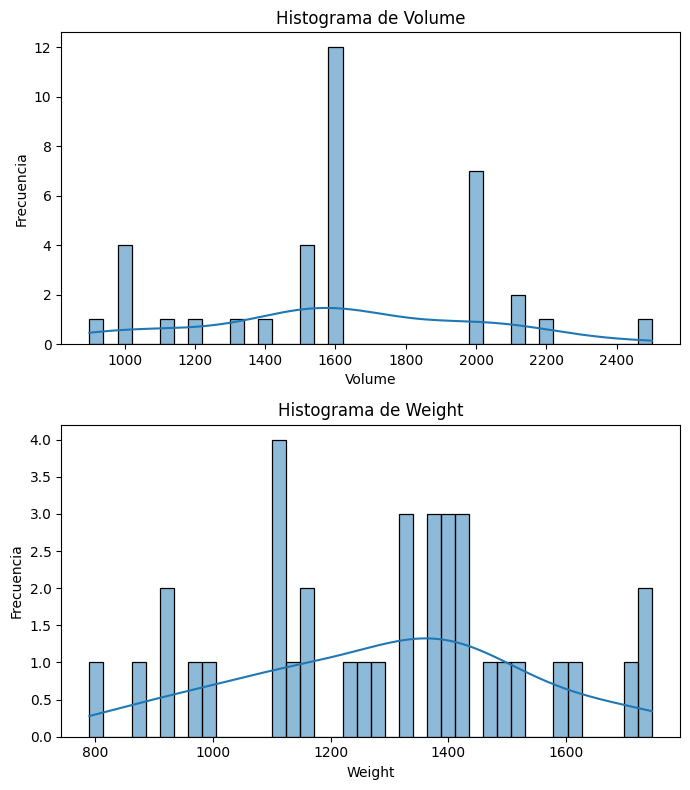

In [66]:
# Crear la cuadrícula de subplots 2x1
fig, axes = plt.subplots(2, 1, figsize=(7, 8))  # Tamaño de la figura ajustado
axes = axes.flatten()  # Aplanar el arreglo de ejes para un acceso más fácil

# Graficar volume
sns.histplot(data=X, x="Volume", bins=40, kde=True, ax=axes[0])
axes[0].set_title(f'Histograma de {"Volume"}')
axes[0].set_xlabel("Volume")
axes[0].set_ylabel('Frecuencia')

# Graficar weight
sns.histplot(data=X, x="Weight", bins=40, kde=True, ax=axes[1])
axes[1].set_title(f'Histograma de {"Weight"}')
axes[1].set_xlabel("Weight")
axes[1].set_ylabel('Frecuencia')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [67]:
# Vamos a explorar el target
y.describe()

count     36.000000
mean     102.027778
std        7.454571
min       90.000000
25%       97.750000
50%       99.000000
75%      105.000000
max      120.000000
Name: CO2, dtype: float64

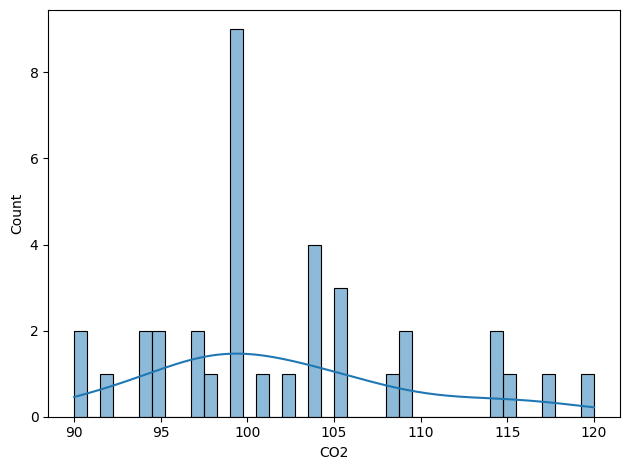

In [90]:
temp = pd.DataFrame(y, columns=["CO2"])
# Graficar weight
sns.histplot(data=temp, x="CO2", bins=40, kde=True)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [104]:
# Vamos a dividir los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import OneHotEncoder

# Vamos a crear una pipeline para categorizar los nombres y escalar los numéricos
preprocessing = ColumnTransformer([
    ("scaler",StandardScaler(),["Volume","Weight"]),
    ("encoder",OneHotEncoder(handle_unknown="ignore"),["Car","Model"])
])

In [ ]:
# Vamos a probar múltiples modelos de regresión y valorar sus resultados

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor


models = {
    "Regresión logistica":LogisticRegression(random_state=42, max_iter=1000),
    "SGDRegressor":SGDRegressor(random_state=42),
    "Ridge":Ridge(random_state=42),
    "Lasso":Lasso(random_state=42),
    "SVR":SVR(),
    "Random forest regressor":RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    print(f"Entrenando y probando el modelo: {name}")
    
    # Crear pipeline para el modelo
    pipeline = make_pipeline(preprocessing,model)

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluación cruzada en el conjunto de entrenamiento
    y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

    # Evaluación cruzada en el conjunto de prueba
    y_test_pred = cross_val_predict(pipeline, X_test, y_test, cv=3)

    # Mostrar el RMSE en el conjunto de entrenamiento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    print(f"RMSE en el conjunto de entrenamiento: {rmse_train:.2f}")
    # Mostrar el RMSE en el conjunto de entrenamiento en el conjunto de prueba
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    print(f"RMSE en el conjunto de prueba: {rmse_test:.2f}")

Entrenando y probando el modelo: Regresión logistica
RMSE en el conjunto de entrenamiento: 7.11
RMSE en el conjunto de prueba: 6.26
Entrenando y probando el modelo: SGDRegressor
RMSE en el conjunto de entrenamiento: 64.22
RMSE en el conjunto de prueba: 28.99
Entrenando y probando el modelo: Ridge
RMSE en el conjunto de entrenamiento: 6.01
RMSE en el conjunto de prueba: 8.88
Entrenando y probando el modelo: Lasso
RMSE en el conjunto de entrenamiento: 6.08
RMSE en el conjunto de prueba: 10.75
Entrenando y probando el modelo: SVR
RMSE en el conjunto de entrenamiento: 6.70
RMSE en el conjunto de prueba: 12.12
Entrenando y probando el modelo: Random forest regressor
RMSE en el conjunto de entrenamiento: 6.37
RMSE en el conjunto de prueba: 9.61


In [ ]:
# Algo raro sucede con el SGDRegressor, el RMSE es mayor al tramo del target (90-120)
# Parece que el modelo con mejor rendimiento es Ridge, vamos a ver si podemos afinarlo un poco más

In [114]:
from sklearn.pipeline import Pipeline

# Crear pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('ridge', Ridge())
])

# Definir el rango de parámetros para la búsqueda
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['lsqr', 'auto'],
}

# Realizar una búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': 10, 'ridge__fit_intercept': True, 'ridge__solver': 'lsqr'}


In [118]:
# Creamos el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el modelo
best_model.fit(X_train, y_train)

# Evaluación cruzada en el conjunto de entrenamiento
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

# Evaluación cruzada en el conjunto de prueba
y_test_pred = cross_val_predict(best_model, X_test, y_test, cv=3)

# Mostrar el RMSE en el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
print(f"RMSE en el conjunto de entrenamiento: {rmse_train:.2f}")
# Mostrar el RMSE en el conjunto de entrenamiento en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
print(f"RMSE en el conjunto de prueba: {rmse_test:.2f}")

RMSE en el conjunto de entrenamiento: 5.84
RMSE en el conjunto de prueba: 8.29


In [ ]:
'''
Hemos pasado de:

RMSE en el conjunto de entrenamiento: 6.01
RMSE en el conjunto de prueba: 8.88

A:

RMSE en el conjunto de entrenamiento: 5.84
RMSE en el conjunto de prueba: 8.29

Lo cual es una pequeña mejora pero tampoco nos devuelve un modelo muy preciso dado a que jugamos con un espacio de valores de 30 puntos,
pero teniendo tan pocas muestras no se puede conseguir un modelo muy fino
'''

In [119]:
# Guardamos el modelo para futuro uso
joblib.dump(best_model, "./modelo2_11CO2.pkl")

['./modelo2_11CO2.pkl']